# Analysing the $mBasicPH\_storage$ model

## Settings

For working with the model, we first import some packages and the modelclass:

In [1]:
# In case, working directory is not set correctly
#os.chdir('C:\\Users\\mpher\\Documents\\Uni\\Master\\02_Exchange\\01_Academics\\Energy Economics of the Green Transition\\0_Final Project\EnergyEconGroupWork')

In [2]:
import os
current_directory = os.getcwd()
print(current_directory)

c:\Users\mpher\Documents\Uni\Master\02_Exchange\01_Academics\Energy Economics of the Green Transition\EnergyEconGroupWork


In [3]:
%run ./stdPackages.ipynb
from pyDbs import *

os.chdir(os.path.join(d['curr'], 'py'))

from mBasicPH_storage import *
os.chdir(d['curr'])

Next we load the database:

In [4]:
kwargs = {'variables': ['Fundamentals', 'LoadVariables', 'GeneratorsVariables','StorageVariables','TransmissionLines'],
        'maps': ['LoadMaps','GeneratorsMaps','StorageMaps','MarketMaps'],
        'variable2D': ['HourlyVariation'],
        'scalars': ['Scalars']}

path_to_data = os.path.join(d['curr'], 'Data', 'mBasicPH_storage_Data.xlsx')

db = read.dbFromWB(path_to_data, kwargs)
readSets(db)

Convert variables to floats:

In [5]:
[db.__setitem__(var,db[var].astype(float).sort_index()) for var in db.getTypes('variable').keys()];

We need to read in heat areas manually:

In [6]:
db['g_H'] = db['id2g_H'].get_level_values('g_H').unique()

In [7]:
db['g_H']

Index(['DK_Central', 'DK_Decentral'], dtype='object', name='g_H')

We need to read in electricity areas manually:

In [8]:
db['g_E'] = db['id2g_E'].get_level_values('g_E').unique()

In [9]:
db['g_E']

Index(['DK'], dtype='object', name='g_E')

Collect all areas in one:

In [10]:
db['g'] = db['g_E'].copy()

## Initialze Model and Debug

In [11]:
m=mSimple(db)
m.db.symbols.keys()

dict_keys(['EmissionTax', 'FuelPrice', 'EmissionIntensity', 'LoadVariation_E', 'Load_E', 'LoadVariation_H', 'Load_H', 'E2H', 'GeneratingCap_H', 'FuelMix', 'GeneratingCap_E', 'OtherMC', 'FOM', 'chargeCap_H', 'effD', 'selfDischarge', 'sCap', 'effC', 'lineCapacity', 'lineFOM', 'lineMC', 'c_H2g_H', 'c_E2g_E', 'id2tech', 'tech2modelTech', 'id2g_E', 'id2hvt', 'id2g_H', 'g_E2g_H', 'g_H2g', 'g_E2g', 'CapVariation', 'MWP_E', 'MWP_H', 'lineLoss', 'EmissionType', 'BFt', 'c_E', 'h', 'c_H', 'id', 'g_E', 'g_E_alias', 'hvt', 'g_H', 'g', 'gConnected', 'id2modelTech2tech'])

The problem was, that the storage was not correctly mapped to the heating area. Now it is included in the index below. You can check so by searching for *id_DK_Central_HS* and *id_DK_Decentral_HS*.

In [12]:
m.db['id2g_H']

MultiIndex([(          'id_DK_Central_BH_Biogas',   'DK_Central'),
            (         'id_DK_Central_BH_Biomass',   'DK_Central'),
            (          'id_DK_Central_BH_Natgas',   'DK_Central'),
            (             'id_DK_Central_BH_Oil',   'DK_Central'),
            (           'id_DK_Central_BH_Waste',   'DK_Central'),
            (          'id_DK_Central_BP_Biogas',   'DK_Central'),
            (         'id_DK_Central_BP_Biomass',   'DK_Central'),
            (            'id_DK_Central_BP_Coal',   'DK_Central'),
            (          'id_DK_Central_BP_Natgas',   'DK_Central'),
            (             'id_DK_Central_BP_Oil',   'DK_Central'),
            (           'id_DK_Central_BP_Waste',   'DK_Central'),
            (                 'id_DK_Central_EP',   'DK_Central'),
            (         'id_DK_Central_HPstandard',   'DK_Central'),
            (      'id_DK_Central_HPsurplusheat',   'DK_Central'),
            (                 'id_DK_Central_HS',   'DK_Centra

## Solve Model

We then initialize and solve the model:

In [13]:
m()

Solution status 0: Optimization terminated successfully. (HiGHS Status 7: Optimal)


In [14]:
m.db['charge_H']

g_H           h     id                
DK_Central    1     id_DK_Central_HS      142.346000
              2     id_DK_Central_HS      142.346000
              3     id_DK_Central_HS      142.346000
              4     id_DK_Central_HS      142.346000
              5     id_DK_Central_HS        0.000000
                                             ...    
DK_Decentral  8756  id_DK_Decentral_HS    105.282967
              8757  id_DK_Decentral_HS    102.980473
              8758  id_DK_Decentral_HS    310.204976
              8759  id_DK_Decentral_HS    424.086000
              8760  id_DK_Decentral_HS    424.086000
Length: 17520, dtype: float64

In [15]:
m.db['discharge_H']

g_H           h     id                
DK_Central    1     id_DK_Central_HS        0.000000
              2     id_DK_Central_HS        0.000000
              3     id_DK_Central_HS        0.000000
              4     id_DK_Central_HS        0.000000
              5     id_DK_Central_HS      137.613349
                                             ...    
DK_Decentral  8756  id_DK_Decentral_HS      0.000000
              8757  id_DK_Decentral_HS      0.000000
              8758  id_DK_Decentral_HS      0.000000
              8759  id_DK_Decentral_HS      0.000000
              8760  id_DK_Decentral_HS      0.000000
Length: 17520, dtype: float64

In [16]:
m.db['stored_H']

g_H           h     id                
DK_Central    1     id_DK_Central_HS       569.805862
              2     id_DK_Central_HS       711.672413
              3     id_DK_Central_HS       853.419594
              4     id_DK_Central_HS       995.047505
              5     id_DK_Central_HS       856.596898
                                             ...     
DK_Decentral  8756  id_DK_Decentral_HS    7712.642245
              8757  id_DK_Decentral_HS    7809.133106
              8758  id_DK_Decentral_HS    8112.767280
              8759  id_DK_Decentral_HS    8530.026993
              8760  id_DK_Decentral_HS    8946.935613
Length: 17520, dtype: float64

Plotting **stored heat**:

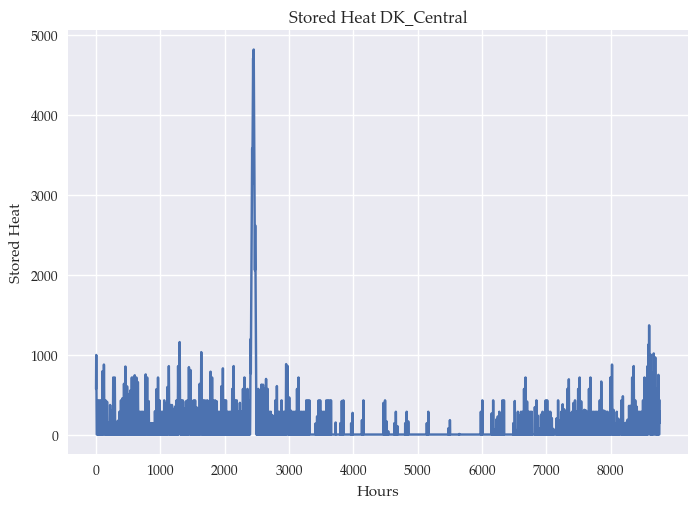

In [23]:
subset_stored_H = m.db['stored_H'][m.db['stored_H'].index.get_level_values('g_H') == 'DK_Central']

# For axis names
tick_positions = range(0, 8761, 1000)

# Plot the subset DataFrame
subset_stored_H.plot()
plt.xlabel('Hours')
plt.ylabel('Stored Heat')
plt.xticks(tick_positions, tick_positions)
plt.title('Stored Heat DK_Central')
plt.show()

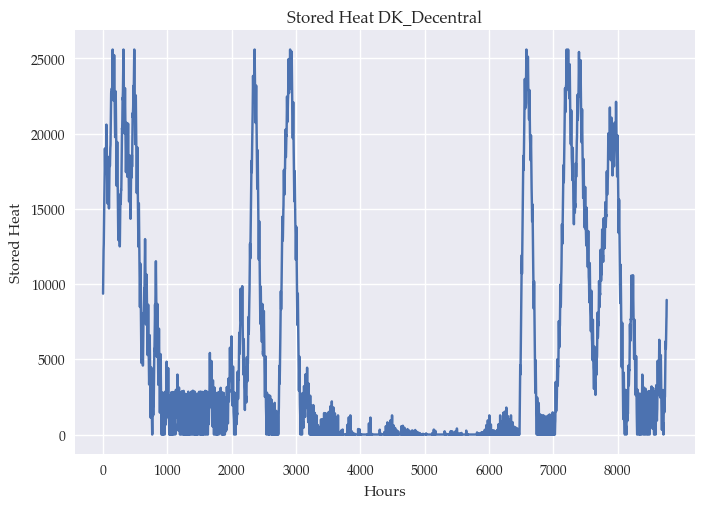

In [24]:
subset_stored_H = m.db['stored_H'][m.db['stored_H'].index.get_level_values('g_H') == 'DK_Decentral']

# For axis names
tick_positions = range(0, 8761, 1000)

# Plot the subset DataFrame
subset_stored_H.plot()
plt.xlabel('Hours')
plt.ylabel('Stored Heat')
plt.xticks(tick_positions, tick_positions)
plt.title('Stored Heat DK_Decentral')
plt.show()

What to plot?

- CO2 Emissions
- Usage of Storage
- Marginal Economic value of storage
- seasonal storage?